# Classification สำหรับจัดกลุ่ม Type1 ของ Pokemon
### โดย นายอิสรา นรานิรัติศัย รหัสนักศึกษา 57011546
### วิชา Introduction to Data Analytics Course
### เทอม 2 ปีการศึกษา 2560
### ภาควิชา วิศวกรรมคอมพิวเตอร์ สถาบันเทคโนโลยีพระจอมเกล้าเจ้าคุณทหารลาดกระบัง
วันที่ส่ง 25/3/2018


## Getting Started
### Import Library

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

### Import Data

In [33]:
pokemonsData = pd.read_csv('resources/pokemon.csv')

### Show All Columns

In [34]:
pokemonsData.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Checkout Data

In [35]:
pokemonsData.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Display possible class/label
using [sklean's LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [36]:
le = preprocessing.LabelEncoder()
le.fit(pokemonsData['type1'])
le.classes_

array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'], dtype=object)

### Attributes

- 'against_bug'
- 'against_dark'
- 'against_dragon'
- 'against_electric'
- 'against_fairy'
- 'against_fight'
- 'against_fire'
- 'against_flying'
- 'against_ghost'
- 'against_grass'
- 'against_ground'
- 'against_ice'
- 'against_normal'
- 'against_poison'
- 'against_psychic'
- 'against_rock'
- 'against_steel'
- 'against_water'

### Handle missing values
the attributes that we're using don't have any missing values

## 10-Fold Cross Validation

In [37]:
from sklearn.model_selection import KFold

## Using Attr
X = pokemonsData[['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']]
y = le.transform(pokemonsData['type1'])

kf = KFold(n_splits=10, random_state=101)
kf.get_n_splits(X)

10

### 1. K-Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

count = 0

accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier()
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    count += 1
    accuracy_list.append(accuracy)
    print("Step {}: Accuracy = {}".format(count, accuracy))
print(np.mean(accuracy_list))

Step 1: Accuracy = 0.8765432098765432
Step 2: Accuracy = 0.8625
Step 3: Accuracy = 0.825
Step 4: Accuracy = 0.8125
Step 5: Accuracy = 0.85
Step 6: Accuracy = 0.7625
Step 7: Accuracy = 0.8875
Step 8: Accuracy = 0.7625
Step 9: Accuracy = 0.7625
Step 10: Accuracy = 0.75
0.8151543209876543


### 2. MLPClassifier

In [52]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

count = 0

accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = MLPClassifier(max_iter=1000)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    count += 1
    accuracy_list.append(accuracy)
    print("Step {}: Accuracy = {}".format(count, accuracy))
print(np.mean(accuracy_list))

Step 1: Accuracy = 0.9753086419753086
Step 2: Accuracy = 0.8625
Step 3: Accuracy = 0.925
Step 4: Accuracy = 0.8625
Step 5: Accuracy = 0.7875
Step 6: Accuracy = 0.775
Step 7: Accuracy = 0.8875
Step 8: Accuracy = 0.8375
Step 9: Accuracy = 0.825
Step 10: Accuracy = 0.8
0.8537808641975309


### MLP Classifier's Detail

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
# print("Coef: " + str(clf.coefs_))
# print("Intercept: " + str(clf.intercepts_))
print("The number of iterations the solver has ran : " + str(clf.n_iter_))
print("The current loss : " + str(clf.loss_))
print("Number of layers : " + str(clf.n_layers_))
print("Accuracy: " + str(accuracy))

The number of iterations the solver has ran : 332
The current loss : 0.10048920987470683
Number of layers : 3
Accuracy: 0.8557213930348259


### Accuracy in each class (Using MLP Classifier)

In [57]:
from sklearn.metrics import classification_report
# print(le.classes_)
# y = le.transform(pokemonsData['type1'])
print(classification_report(y_test, predictions, target_names=le.classes_))

             precision    recall  f1-score   support

        bug       0.96      0.92      0.94        24
       dark       0.88      0.88      0.88         8
     dragon       0.73      0.73      0.73        11
   electric       1.00      1.00      1.00         6
      fairy       1.00      1.00      1.00         4
   fighting       0.64      1.00      0.78         7
       fire       0.77      1.00      0.87        10
     flying       0.00      0.00      0.00         1
      ghost       0.56      0.62      0.59         8
      grass       1.00      0.90      0.95        21
     ground       0.75      0.50      0.60         6
        ice       0.67      0.80      0.73         5
     normal       1.00      1.00      1.00        22
     poison       1.00      0.50      0.67         6
    psychic       0.87      0.93      0.90        14
       rock       0.73      0.92      0.81        12
      steel       0.67      0.25      0.36         8
      water       0.90      0.93      0.91   

C:\Users\isara\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion Matrix (Using MLP Classifier)

<class 'numpy.ndarray'>


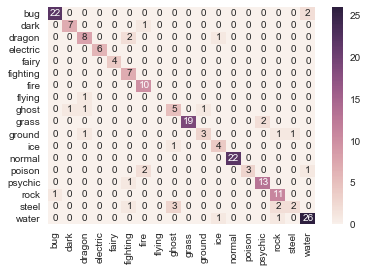

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(type(cm))
lk = preprocessing.LabelEncoder()
lk.fit(y_test)
df_cm = pd.DataFrame(cm, index = [le.classes_[i] for i in lk.classes_ ],
                     columns = [le.classes_[i] for i in lk.classes_ ])
sns.heatmap(df_cm, annot=True)